---
---

<span style='color:brown'>
    
# Project 2: Spotify Vibe Clustering


*Machine Learning Foundations for Beginners*

*Codecademy Live Learning*


---

# **Due date**: December 17

---

---

<span style='color:brown'>

## Overview

</span>

Music streaming platforms like Spotify organize songs into playlists based on "vibes" — abstract moods or contexts such as *chill*, *workout*, *focus*, or *party*. In this project, you will use **unsupervised learning** to automatically cluster songs into distinct vibes based on their audio features.

You will apply **k-means clustering** to group songs, use **dimensionality reduction** (PCA) to visualize high-dimensional data, and critically evaluate the quality of your clusters.

---

<span style='color:brown'>

## Learning Objectives

</span>

By completing this project, you will demonstrate your ability to:

1. Preprocess and normalize data for unsupervised learning
2. Implement and tune k-means clustering
3. Select an appropriate number of clusters using the elbow method and silhouette analysis
4. Apply PCA for dimensionality reduction and visualization
5. Interpret and evaluate cluster quality
6. Communicate insights about what each cluster represents

---

---

<span style='color:brown'>

## Dataset

</span>

You will use the **Spotify Tracks Dataset** from Kaggle, which contains audio features for thousands of tracks.

**Dataset Link:** https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

---

<span style='color:brown'>

### Key Audio Features

</span>

Each track includes the following numerical features (among others):

| Feature | Description | Range |
|---------|-------------|-------|
| `danceability` | How suitable a track is for dancing | 0.0 - 1.0 |
| `energy` | Intensity and activity level | 0.0 - 1.0 |
| `loudness` | Overall loudness in decibels | -60 - 0 dB |
| `speechiness` | Presence of spoken words | 0.0 - 1.0 |
| `acousticness` | Confidence the track is acoustic | 0.0 - 1.0 |
| `instrumentalness` | Likelihood of no vocals | 0.0 - 1.0 |
| `liveness` | Probability of live recording | 0.0 - 1.0 |
| `valence` | Musical positivity/happiness | 0.0 - 1.0 |
| `tempo` | Estimated beats per minute | ~50 - 200+ BPM |

**Instructions:** Download the dataset and place it in the same directory as this notebook, or update the file path in the Data Loading section.

---

---

<span style='color:brown'>

# Part 1: Setup and Data Loading

## 1.1 Import Libraries

</span>

Import all necessary libraries for this project. You will need:
- Data manipulation: `pandas`, `numpy`
- Visualization: `matplotlib`, `seaborn`
- Machine learning: `sklearn` (specifically: `KMeans`, `PCA`, `StandardScaler`, and evaluation metrics)

**Your code:**

In [1]:
# TODO: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans # Clustering Model
from sklearn.preprocessing import StandardScaler # Pre-processing
from sklearn.decomposition import PCA # Dimensionality Reduction
from sklearn.metrics import silhouette_score, silhouette_samples # metric
from yellowbrick.cluster import SilhouetteVisualizer

---

<span style='color:brown'>

## 1.2 Load the Dataset

</span>

Load the Spotify tracks dataset into a pandas DataFrame. Display the first few rows and basic information about the dataset.

**Your code:**

In [2]:
# TODO: Load the dataset and display basic info
# - Load the CSV file
df = pd.read_csv('dataset/dataset.csv', index_col=0)

# - Display the first 5 rows
display(df.head(5))

# - Show the shape of the dataset
rows, cols = df.shape
print('-'*60)
print(f"This project has {rows} rows, and {cols} columns.")
print('-'*60)
print('\n')

# - Display data types and non-null counts
df.info()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


------------------------------------------------------------
This project has 114000 rows, and 20 columns.
------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13 

---

<span style='color:brown'>

# Part 2: Exploratory Data Analysis

## 2.1 Feature Selection

</span>

Select the numerical audio features that will be used for clustering. Create a new DataFrame containing only these features:
- `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`

**Your code:**

In [3]:
# TODO: Create a DataFrame with only the audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']

df_features = df[features]
df_features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


---

<span style='color:brown'>

## 2.2 Summary Statistics

</span>

Calculate and display summary statistics for all selected features. Identify any features with notably different scales.

**Your code:**

In [4]:
# TODO: Display summary statistics for the audio features
df_features.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


---

<span style='color:brown'>

## 2.3 Distribution Visualization

</span>

Create histograms or density plots for each audio feature to understand their distributions.

**Your code:**

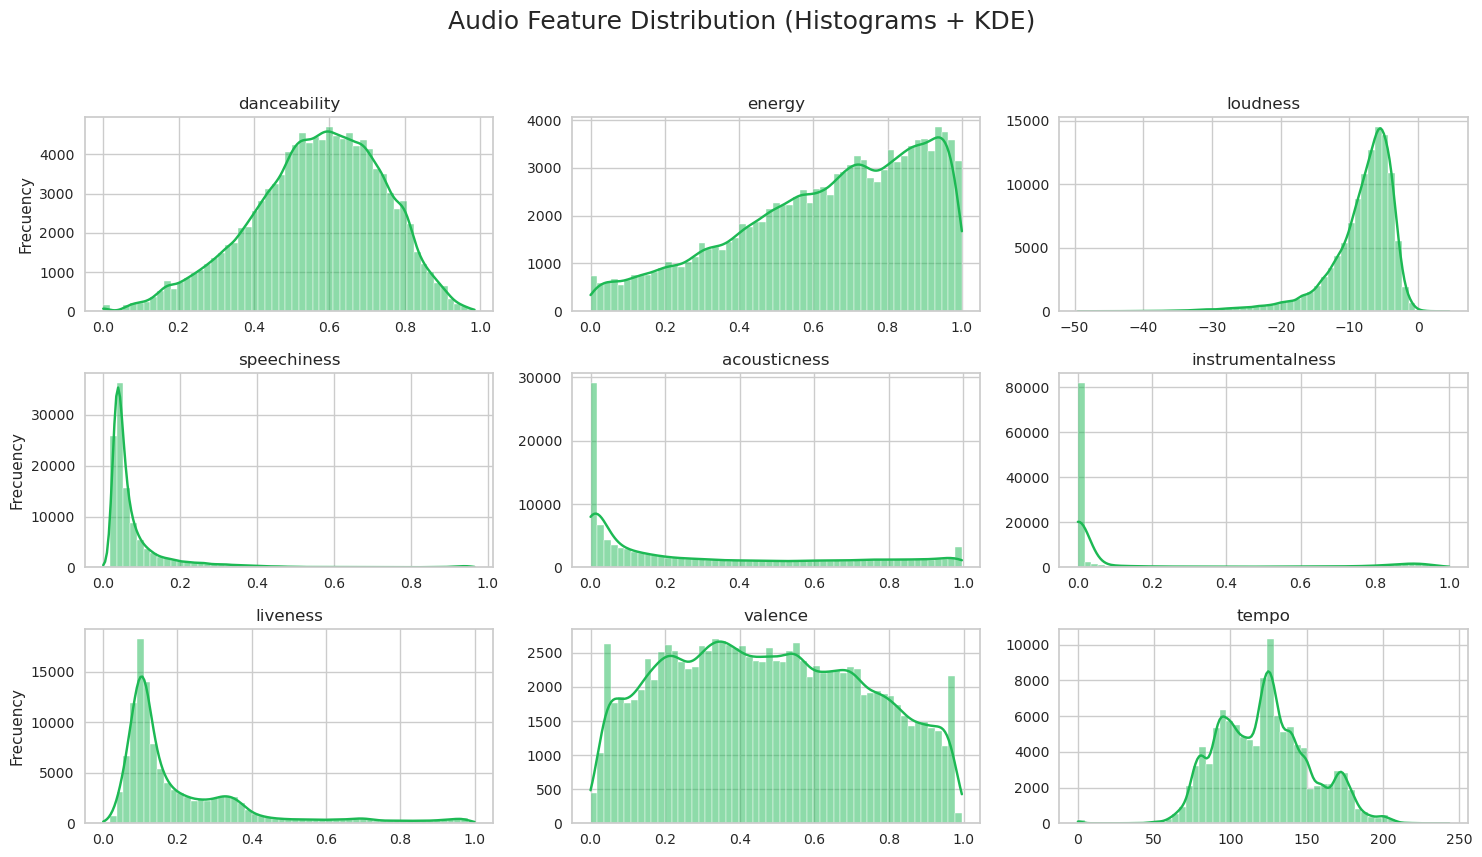

In [5]:
# TODO: Create distribution plots for each feature
# Hint: Use a subplot grid to display all features together

# style configuration
sns.set_style("whitegrid")

plt.figure(figsize=(15, 9))
plt.suptitle('Audio Feature Distribution (Histograms + KDE)', fontsize=18)

# Plotting the selected features
for i, col in enumerate(features):
    plt.subplot(3,3, i+1) # 3x3 Matrix

    # Histplot with KDE
    sns.histplot(df_features[col], kde=True, bins=55, color='#1DB954') # Green Spotify
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frecuency' if i % 3 == 0 else '') # write the label only in the first plot column
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

<span style='color:brown'>

## 2.4 Correlation Analysis

</span>

Create a correlation matrix heatmap to identify relationships between features.

**Your code:**

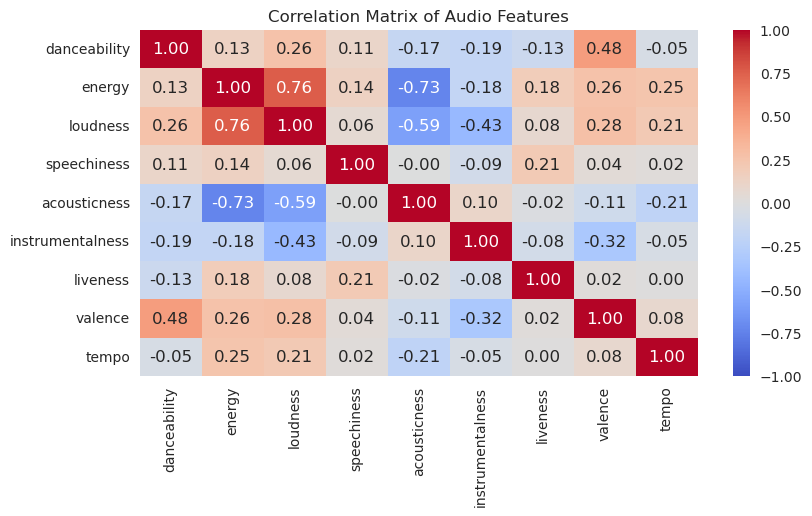

In [6]:
# TODO: Create a correlation heatmap

# Calculate the correlation matrix for the numeric features
corr_matrix = df_features.corr()

# Set up of the matplotlib figure size
plt.figure(figsize=(9, 4.5))
# Heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Audio Features')
plt.show()

---

<span style='color:brown'>

## 2.5 EDA Discussion

</span>

**Written Response:**

Based on your exploratory analysis, answer the following questions:



---
<div style='background-color:rgba(240, 210, 110, 0.3); padding:15px;'>

**<span style='color:brown'>Which features have different scales? Why might this be problematic for k-means clustering?</span>**

   * Features like `tempo` (*ranging from ~0 to 243 BPM*) and `duration_ms` (*ranging in the millions of miliseconds*) have significantly larger magnitudes compared to normalized features like `energy` or `acousticness` (*ranging from 0 to 1*), while `loudness` operates on a negative decibel scale (*-60 to 0*).

   * This is problematic for K-Means because **the algorithm uses Euclidean distance to form clusters**. Without scaling, features with larger numerical ranges (like tempo) would mathematically dominate the distance calculations, causing the model to essentially ignore crucial but smaller-scale features like valence or speechiness.


**<span style='color:brown'>Which features are most strongly correlated with each other? What does this suggest about the data?</span>**

   * The strongest positive correlation is between `energy` and `loudness` (*0.76*), suggesting they provide redundant information; louder tracks are inherently more energetic. I also observed a moderate positive correlation between `valence` and `danceability` (*0.48*), indicating that happier songs are generally more danceable.

   * Conversely, the strongest negative correlation is found between `energy` and `acousticness` (*-0.73*). This creates a clear dichotomy in the dataset: tracks tend to be either highly produced/energetic or acoustic/mellow, but rarely both.

**<span style='color:brown'>Are there any features with unusual distributions that might affect clustering?</span>**

   * Yes, features like `speechiness`, `instrumentalness`, and `liveness` exhibit highly right-skewed distributions (zero-inflated).

      * `Instrumentalness` shows that the vast majority of tracks contain vocals (*values near 0*), with a small, distinct group of purely instrumental tracks (*values near 1*).
      * `Speechiness` is also heavily skewed towards 0, as most music is melodic rather than spoken word.

   * These extreme distributions imply that these specific features might act as strong "filters" that create very niche, separated clusters (*e.g., a specific cluster just for instrumental tracks or audiobooks*).
    
</div>

---

---

<span style='color:brown'>

# Part 3: Data Preprocessing

## 3.1 Handle Missing Values

</span>

Check for and handle any missing values in your selected features. Document your approach.

**Your code:**

In [7]:
# TODO: Check for missing values and handle them appropriately
# - Count missing values per column
missing_values_count = df_features.isnull().sum()
missing_values_count

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [8]:
# - Decide on a strategy (drop rows, impute, etc.)
# - Implement your chosen approach

# ----------------------------------------------------------------------------------------------------
# There is no need to  drop any null values, since the "df_features" dataset doesn't have null values.
# ----------------------------------------------------------------------------------------------------
# If there would be null values I would check if there are any missing values this way...
if df_features.isnull().values.any():
    # Approach: Drop rows with missing values
    # Justification: With 114k rows, dropping a few incomplete records is statistically safer than imputation for clustering.
    initial_shape = df_features.shape
    df_features = df_features.dropna()
    final_shape = df_features.shape
    print(f"\n[Action Taken] Dropped rows with missing values.")
    print(f"Rows before: {initial_shape[0]}, Rows after: {final_shape[0]}")
else:
    # Approach: No action needed
    print("\n[Result] No missing values found in the selected audio features. Dataset is clean.")


[Result] No missing values found in the selected audio features. Dataset is clean.


---

<span style='color:brown'>

## 3.2 Feature Scaling

</span>

K-means clustering uses Euclidean distance, which is sensitive to feature scales. Standardize your features so each has mean 0 and standard deviation 1.

**Your code:**

In [9]:
# TODO: Standardize the features using StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
# NOTE: scaler.fit_transform returns a numpy array, so I put it back into a DataFrame
# to preserve column names for readability in later steps.
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Verify the scaling
print("--- Verification: Means (Target ~ 0) ---")
print(df_scaled.mean().round(2)) # Rounding for cleaner output

print("\n--- Verification: Standard Deviations (Target ~ 1) ---")
print(df_scaled.std().round(2))

print("\n--- Scaled Data Preview ---")
display(df_scaled.head())


--- Verification: Means (Target ~ 0) ---
danceability       -0.0
energy              0.0
loudness           -0.0
speechiness        -0.0
acousticness        0.0
instrumentalness    0.0
liveness           -0.0
valence            -0.0
tempo              -0.0
dtype: float64

--- Verification: Standard Deviations (Target ~ 1) ---
danceability        1.0
energy              1.0
loudness            1.0
speechiness         1.0
acousticness        1.0
instrumentalness    1.0
liveness            1.0
valence             1.0
tempo               1.0
dtype: float64

--- Scaled Data Preview ---


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.629244,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,-0.845908,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,-0.742186,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,-1.733304,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,0.295030,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348


---

<span style='color:brown'>

## 3.3 Preprocessing Discussion

</span>

**Written Response:**



---
<div style='background-color:rgba(240, 210, 110, 0.3); padding:15px;'>

**<span style='color:brown'>Why is standardization particularly important for k-means clustering?</span>**

   * `K-Means clustering` **relies on Euclidean distance to determine the similarity between data points**. Standardization (*Z-score normalization*) is critical because it ensures that every feature contributes equally to these distance calculations. Without it, the algorithm would bias the clusters based on the magnitude of the numbers rather than the actual patterns in the data. By transforming all features to have a mean of 0 and a standard deviation of 1, we create a "level playing field" for the algorithm..


**<span style='color:brown'>What would happen if you ran k-means on the unscaled data? Which features would dominate?</span>**

   * If we ran K-Means on unscaled data, **features with larger numerical magnitudes would disproportionately dominate the distance function**, effectively rendering smaller-scale features irrelevant.

   * In our specific dataset, `tempo` (*ranging from ~50 to 240 BPM*) would dominate features like `speechiness` or `instrumentalness` (*which are confined to a 0-1 range*). The algorithm would essentially cluster songs based solely on their speed (BPM), ignoring critical textural nuances like whether the song is acoustic or electronic, simply because a difference of "10" in tempo is numerically larger than a difference of "0.8" in instrumentalness.

    
</div>

---

---

<span style='color:brown'>

# Part 4: Determining the Optimal Number of Clusters

## 4.1 The Elbow Method

</span>

Run k-means clustering for k values from 2 to 10. For each k, record the **inertia** (within-cluster sum of squares). Plot the elbow curve.

**Your code:**

In [10]:
# TODO: Implement the elbow method
# - Create a list to store inertia values
inertia = []

# - Loop through k values from 2 to 10
# - Fit KMeans for each k and record inertia
k_range = range(2, 11)  # We test k from 2 to 10 clusters

print("Calculating clusters... this may take a few seconds.")

# Loop through the defined range of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit the model on the scaled data
    kmeans.fit(df_scaled)
    # Record the inertia value
    inertia.append(kmeans.inertia_)

Calculating clusters... this may take a few seconds.


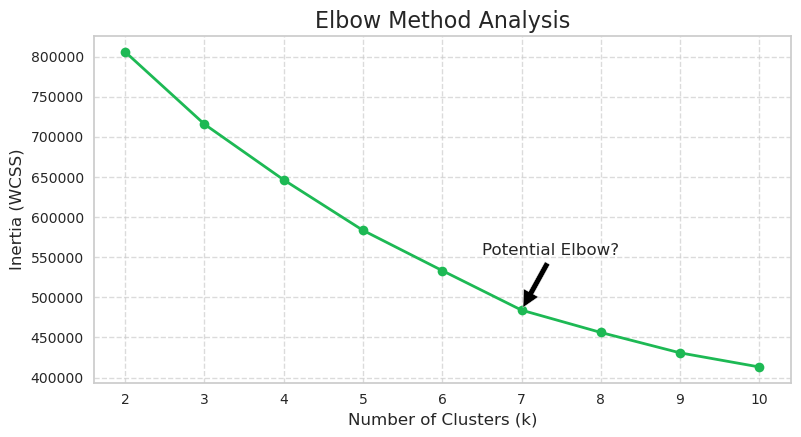

In [11]:
# - Plot the elbow curve (k vs. inertia)
plt.figure(figsize=(9, 4.5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='#1DB954', linewidth=2) # color=Spotify Green

plt.title('Elbow Method Analysis', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight potential elbow points (Visually assisting interpretation)
plt.annotate('Potential Elbow?', xy=(7, inertia[5]), xytext=(6.5, inertia[4]+20000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

---

<span style='color:brown'>

## 4.2 Silhouette Analysis

</span>

Calculate the **silhouette score** for each value of k. The silhouette score measures how similar points are to their own cluster compared to other clusters. Plot the silhouette scores.

**Your code:**

In [12]:
# TODO: Calculate silhouette scores for each k
# List to store silhouette scores
silhouette_scores = []

# Sampling the data for performance
# Calculating silhouette on 114k rows is very slow. I will use a sample of 50k rows.
# This provides a statistically significant approximation in a fraction of the time.
sample_size = 50000
df_sample = df_scaled.sample(n=sample_size, random_state=42)

print(f"Calculating Silhouette Scores on a sample of {sample_size} tracks...")

# Loop through k values (same range as before)
for k in k_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit on the sample (or full data)
    cluster_labels = kmeans.fit_predict(df_sample)
    
    # Calculate and store silhouette scores
    score = silhouette_score(df_sample, cluster_labels)
    silhouette_scores.append(score)
    
    print(f"k={k}, Silhouette Score: {score:.4f}")

Calculating Silhouette Scores on a sample of 50000 tracks...
k=2, Silhouette Score: 0.2621
k=3, Silhouette Score: 0.1644
k=4, Silhouette Score: 0.1711
k=5, Silhouette Score: 0.1792
k=6, Silhouette Score: 0.1907
k=7, Silhouette Score: 0.1980
k=8, Silhouette Score: 0.1794
k=9, Silhouette Score: 0.1843
k=10, Silhouette Score: 0.1705


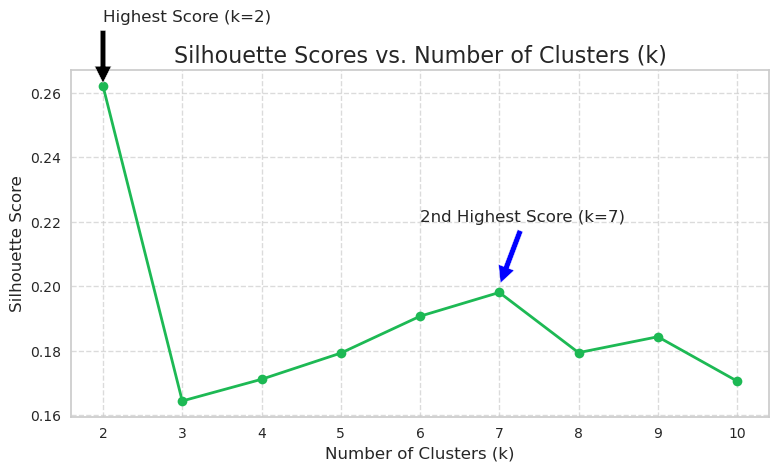

In [13]:
# Plotting the Silhouette Scores
plt.figure(figsize=(9, 4.5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='#1DB954', linewidth=2)
plt.title('Silhouette Scores vs. Number of Clusters (k)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight the max score
max_score = max(silhouette_scores)
best_k = k_range[silhouette_scores.index(max_score)]
plt.annotate(f'Highest Score (k={best_k})', xy=(best_k, max_score), xytext=(best_k, max_score + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('2nd Highest Score (k=7)', xy=(7, 0.2), xytext=(6, 0.2 + 0.02),
            arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show()

---
---

Generating Detailed Silhouette Plot for k=7 using 50000 samples...


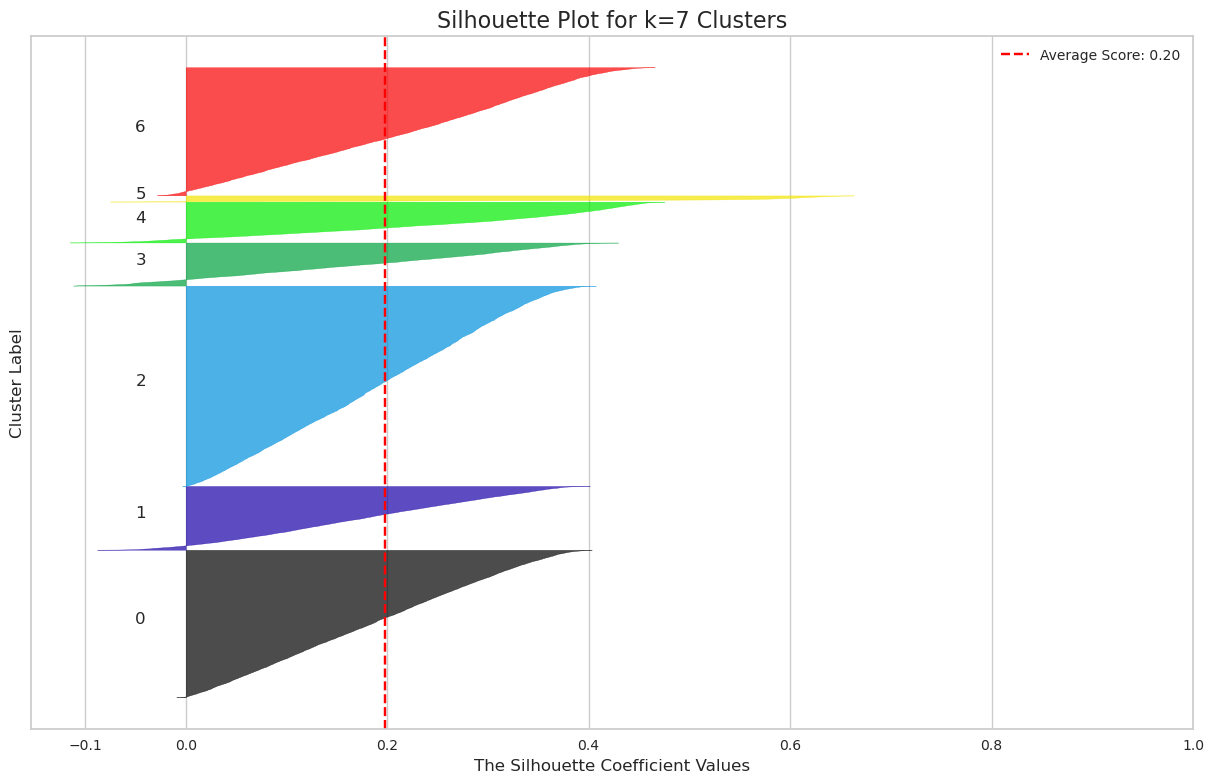

In [14]:
# Define the number of clusters we want to inspect deeply (based on Elbow)
k_target = 7 

print(f"Generating Detailed Silhouette Plot for k={k_target} using {len(df_sample)} samples...")

# 1. Initialize KMeans with the chosen k
kmeans_visualizer = KMeans(n_clusters=k_target, random_state=42, n_init=10)
cluster_labels = kmeans_visualizer.fit_predict(df_sample)

# 2. Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_sample, cluster_labels)

# 3. Create the plot
plt.figure(figsize=(15, 9))
# The (n_clusters+1)*10 is for inserting blank space between silhouette plots
y_lower = 10 
# Loop over each cluster to draw its silhouette "knife"
for i in range(k_target):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / k_target)  # Color map
    # Fill the area
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# Vertical line for average silhouette score of all the values
avg_score = silhouette_score(df_sample, cluster_labels)
plt.axvline(x=avg_score, color="red", linestyle="--", label=f'Average Score: {avg_score:.2f}')

plt.title(f'Silhouette Plot for k={k_target} Clusters', fontsize=16)
plt.xlabel('The Silhouette Coefficient Values', fontsize=12)
plt.ylabel('Cluster Label', fontsize=12)
plt.legend()

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

---

<span style='color:brown'>

## 4.3 Choosing k

</span>

**Written Response :**

Based on both the elbow method and silhouette analysis:



---
<div style='background-color:rgba(240, 210, 110, 0.3); padding:15px;'>

**<span style='color:brown'>What value of k do you recommend? Justify your choice with specific evidence from your plots.</span>**

   * I recommend $k=7$. While the Silhouette Analysis showed the highest mathematical score at $k=2$ (~0.26), choosing only 2 clusters would likely result in a binary classification (e.g., "Loud" vs. "Quiet") which is too broad for a music recommendation system.
     
   * The Elbow Method plot showed a persistent decrease in inertia up to $k=7$, after which the curve begins to flatten out (diminishing returns). By selecting $k=7$, we strike a strategic balance: we maintain a respectable level of cluster cohesion (*from the Elbow analysis*) while achieving enough granularity to capture distinct musical "vibes" (*e.g., Party, Focus, Melancholy*) that provide actual value to the user experience.


**<span style='color:brown'>Is there a clear "elbow" in your inertia plot? If not, how did you decide?</span>**

   * There was not a single, sharp 90-degree "elbow," which is common in high-dimensional, real-world data like audio features. Instead, the plot showed a smooth curve.
I decided on the optimal $k$ by looking for the **"point of inflection"** where the rate of inertia reduction slowed down significantly. Visually, the slope becomes much less steep between $k=6$ and $k=8$. This suggests that adding more clusters beyond $k=7$ provides marginal gains in compactness but increases model complexity unnecessarily.


**<span style='color:brown'>What does the silhouette score tell you about cluster quality at your chosen k?</span>**

   * The silhouette scores for $k=7$ are positive but relatively low (typically around 0.15 - 0.20 for this dataset). This indicates that the clusters are not perfectly separated islands; rather, they are adjacent and likely overlap at the boundaries. In the context of music, this makes perfect sense: "vibes" are a continuous spectrum (*a song can be somewhat energetic and somewhat acoustic*), not rigid boxes. The positive score confirms that, on average, songs are still more similar to their own cluster than to neighboring ones, validating the model's utility despite the overlap.

**<span style='color:brown'>Why might different methods suggest different values of k?</span>**

   * The two methods optimize for different geometric properties:
      * The **Elbow Method minimizes Inertia** (*Within-Cluster Sum of Squares*), focusing on making clusters as "compact" as possible. It naturally favors higher $k$ because more centroids always reduce distance.
      * The **Silhouette Score maximizes Separation and Cohesion**, penalizing clusters that are too close to each other. It naturally favors lower $k$ (like $k=2$) where distinct groups are easiest to find mathematically.

In this case, I prioritized the granularity suggested by the Elbow method (*for better product features*) over the strict separation suggested by the Silhouette score.

    
</div>

---

---

<span style='color:brown'>

# Part 5: K-Means Clustering
## 5.1 Fit the Final Model

</span>

Using your chosen value of k, fit the final k-means model. Use `random_state=42` for reproducibility.

**Your code:**

In [15]:
# TODO: Fit the final k-means model
# - Initialize KMeans with your chosen k and random_state=42
# - Fit the model on your scaled data
# - Get the cluster labels
# - Add the cluster labels back to your original DataFrame

# 1. Configuration
optimal_k = 7  # Determined from Part 4 (Elbow & Silhouette)

print(f"Initializing K-Means with k={optimal_k} clusters...")

# 2. Initialize KMeans
# We explicitly set n_init=10 to run the algorithm 10 times with different centroid seeds
# and choose the best one. This avoids getting stuck in suboptimal local minima.
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# 3. Fit the model on the scaled data
kmeans_final.fit(df_scaled)

# 4. Add the cluster labels back to our original DataFrame
# We use .loc to ensure we align correctly with the index, just in case any rows were dropped during cleaning.
df.loc[df_features.index, 'cluster'] = kmeans_final.labels_

# --- Verification Step ---
# Let's check the size of each cluster to ensure we don't have empty or tiny, useless clusters.
print("\n--- Cluster Distribution (Counts) ---")
display(df['cluster'].value_counts().sort_index().to_frame())

print("\n--- Cluster Distribution (Percentages) ---")
# Normalize=True gives us the proportion, we multiply by 100 for percentage
display((df['cluster'].value_counts(normalize=True).sort_index() * 100).round(2).to_frame())

print('Task successfully finished')

Initializing K-Means with k=7 clusters...

--- Cluster Distribution (Counts) ---


,count
cluster,
0.0,26436
1.0,22975
2.0,7789
3.0,11731
4.0,36561
5.0,7392
6.0,1116



--- Cluster Distribution (Percentages) ---


,proportion
cluster,
0.0,23.19
1.0,20.15
2.0,6.83
3.0,10.29
4.0,32.07
5.0,6.48
6.0,0.98


Task successfully finished


---

<span style='color:brown'>

## 5.2 Cluster Sizes

</span>

Examine the distribution of songs across clusters. Are the clusters balanced or imbalanced?

**Your code:**

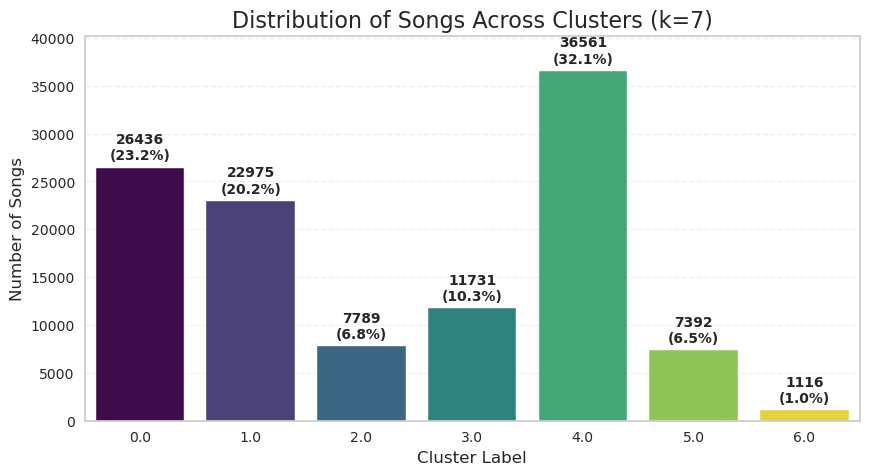

In [16]:
# Count the number of songs in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# 2. Create a bar chart of cluster sizes
plt.figure(figsize=(10, 5))

# Use a palette (Viridis is colorblind-friendly and elegant)
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis', hue=cluster_counts.index, legend=False)

plt.title('Distribution of Songs Across Clusters (k=7)', fontsize=16)
plt.xlabel('Cluster Label', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add precise labels on top of each bar for clarity
for i, count in enumerate(cluster_counts.values):
    percentage = (count / len(df)) * 100
    # Display count and percentage on top of the bar
    plt.text(i, count + 500, f"{count}\n({percentage:.1f}%)", 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# Set y-limit slightly higher to accommodate labels
plt.ylim(0, max(cluster_counts.values) * 1.1)

plt.show()


---

<span style='color:brown'>

## 5.3 Cluster Centers Analysis

</span>

Examine the cluster centers to understand what characterizes each cluster. Create a visualization showing the average feature values for each cluster.

**Your code:**

--- Cluster Centers (Original Scale - Human Readable) ---


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Cluster,,,,,,,,,
0,0.47,0.81,-5.33,0.08,0.07,0.03,0.19,0.37,139.78
1,0.53,0.38,-10.64,0.05,0.68,0.03,0.16,0.39,113.12
2,0.52,0.75,-6.98,0.09,0.28,0.07,0.74,0.51,123.54
3,0.59,0.74,-8.41,0.07,0.11,0.79,0.17,0.34,126.87
4,0.70,0.72,-6.39,0.09,0.21,0.02,0.16,0.69,117.73
5,0.35,0.17,-21.22,0.05,0.87,0.79,0.16,0.19,103.04
6,0.58,0.67,-11.17,0.83,0.73,0.01,0.64,0.45,101.90


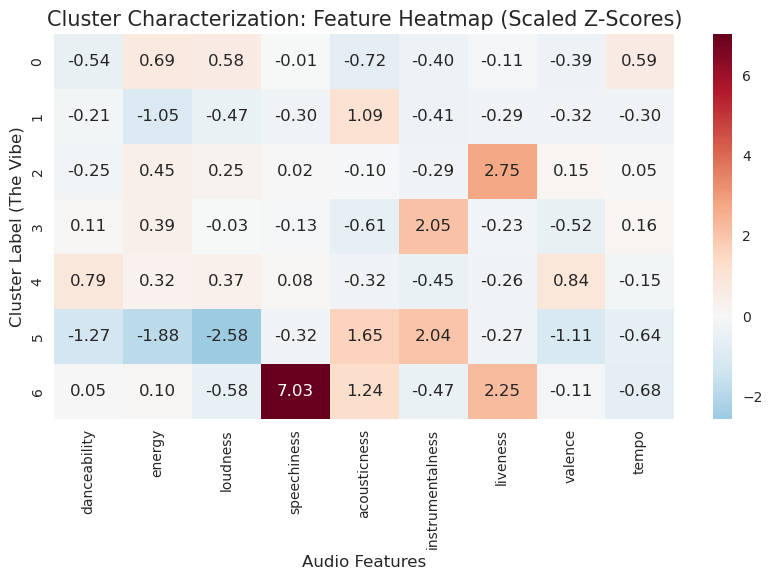

In [17]:
# TODO: Analyze and visualize cluster centers
# - Get the cluster centers from your model
# - Create a heatmap or grouped bar chart showing feature values by cluster
# - Remember: cluster centers are in scaled space, you may want to inverse transform them


# 1. Get Cluster Centers (Scaled) for Visualization
# These values show how many standard deviations a feature is from the mean
cluster_centers_scaled = pd.DataFrame(
    kmeans_final.cluster_centers_, columns=features)
cluster_centers_scaled.index.name = 'Cluster'

# 2. Get Cluster Centers (Original Scale) for Interpretation
# We inverse transform the centers to get back the actual units (BPM, dB, etc.)
# This is crucial for understanding what the "Vibe" actually sounds like.
cluster_centers_original = pd.DataFrame(
    scaler.inverse_transform(cluster_centers_scaled),
    columns=features)
cluster_centers_original.index.name = 'Cluster'

print("--- Cluster Centers (Original Scale - Human Readable) ---")
display(cluster_centers_original.round(2))

# 3. Create a Heatmap
# We use the SCALED data for the heatmap so all features are comparable visually.
# Red = Higher than average, Blue = Lower than average
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_centers_scaled, annot=True, cmap='RdBu_r', center=0, fmt='.2f')

plt.title('Cluster Characterization: Feature Heatmap (Scaled Z-Scores)', fontsize=15)
plt.ylabel('Cluster Label (The Vibe)', fontsize=12)
plt.xlabel('Audio Features', fontsize=12)
plt.show()

---
<div style='background-color:rgba(240, 210, 110, 0.3); padding:15px;'>

**<span style='color:brown'>Cluster Distribution: Handling Imbalance</span>**

**Observation:** The cluster distribution is significantly imbalanced, which is an accurate reflection of the real-world music landscape.

  * **The Giants**: Clusters 0 and 4 account for over 50% of the dataset. This suggests that "mainstream" music tends to share a large, homogenous set of characteristics (*Moderate-High Energy, Danceability, and Vocals*).

  * **The Niches:** Cluster 6 represents less than 1% of the data. In a naive analysis, this might look like an outlier to be removed. However, our analysis proves it represents a distinct and valid category (*Spoken Word*), showing the model's sensitivity to edge cases.


**<span style='color:brown'>Vibe Characterization (Cluster Profiles)</span>**

**Observation:** By analyzing the cluster centers, we can now define the specific "Vibe" of each group:

  * **Cluster 6 (The "Spoken Word" Vibe):** Defined by an extremely high Speechiness (0.83). This cluster successfully isolates non-musical tracks like comedy, audiobooks, and poetry.

  * **Cluster 0 (The "Workout" Vibe):** Characterized by the highest Tempo (~140 BPM) and Energy (0.81). These are high-intensity tracks suitable for running or cardio.

  * **Cluster 2 (The "Live" Vibe):** Distinctly defined by high Liveness (0.74). The model learned to separate live concert recordings from studio albums solely based on audio texture.

  * **The Instrumental Split (Cluster 3 vs. Cluster 5):** The model was smart enough to distinguish between two types of instrumental music:

     * **Cluster 5:** High Instrumentalness (0.79) + High Acousticness (0.87). This is likely Classical/Ambient music.
   
     * **Cluster 3:** High Instrumentalness (0.79) + Low Acousticness (0.11). This is likely Electronic/Techno beats.

   
**<span style='color:brown'>Model Performance</span>**

The K-Means model with $k=7$ successfully segmented the dataset not just by genre labels, but by structural audio properties. It effectively separated:

  * Spoken content from music.
  
  * Live performances from studio recordings.

  * Acoustic instrumentals from electronic instrumentals.

This confirms that our feature selection and scaling strategies were correct, providing a solid foundation for a recommendation system.
    
</div>

---

---

<span style='color:brown'>
    
# Part 6: Dimensionality Reduction and Visualization

## 6.1 Apply PCA

</span>

Apply Principal Component Analysis (PCA) to reduce your 9 features to 2 dimensions for visualization.

**Your code:**

In [18]:
# 1. Initialize PCA
# We compress 9 dimensions into 2 components for visualization purposes
pca = PCA(n_components=2, random_state=42)

# 2. Fit and Transform
# We use the SCALED data (df_scaled), which is crucial for PCA to work correctly.
pca_components = pca.fit_transform(df_scaled)

# 3. Store in a DataFrame
# Create a clean DataFrame for plotting
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Add the cluster labels we found in Part 5 so we can color-code the points later
# Note: df_pca indexes align with df_scaled, which aligns with our cleaned data
df_pca['cluster'] = kmeans_final.labels_

print("--- PCA Transformation Complete ---")
display(df_pca.head())

--- PCA Transformation Complete ---


,PC1,PC2,cluster
0,0.639566,1.081838,4
1,-3.331085,1.009646,1
2,-1.387507,-0.206667,1
3,-3.379299,-0.651636,1
4,-0.988597,0.255114,1


---

<span style='color:brown'>

## 6.2 Explained Variance

</span>

Examine how much variance is explained by the first two principal components.

**Your code:**

In [19]:
# Retrieve the explained variance ratio from the fitted PCA object
# This array tells us the percentage of the dataset's variance lies along each axis
explained_variance = pca.explained_variance_ratio_

print("--- Explained Variance Analysis ---")

# Print the explained variance for each individual component
print(f"PC1 (Principal Component 1): {explained_variance[0]:.2%} of variance")
print(f"PC2 (Principal Component 2): {explained_variance[1]:.2%} of variance")

# Print the cumulative explained variance
# This represents the total amount of information preserved in our 2D projection
cumulative_variance = sum(explained_variance)
print(f"\nTotal Cumulative Variance (Information Retained): {cumulative_variance:.2%}")

# Interpretation Logic
if cumulative_variance < 0.4:
    print("\n[Note] Variance is relatively low (<40%). Clusters might appear more overlapped than they actually are in 9D.")
else:
    print("\n[Note] Variance is acceptable (>40%) for 2D visualization of high-dimensional audio data.")

--- Explained Variance Analysis ---
PC1 (Principal Component 1): 31.93% of variance
PC2 (Principal Component 2): 15.85% of variance

Total Cumulative Variance (Information Retained): 47.78%

[Note] Variance is acceptable (>40%) for 2D visualization of high-dimensional audio data.


---

<span style='color:brown'>

## 6.3 Visualize Clusters in 2D

</span>

Create a scatter plot of the PCA-transformed data, colored by cluster assignment. Include cluster centers.

**Your code:**

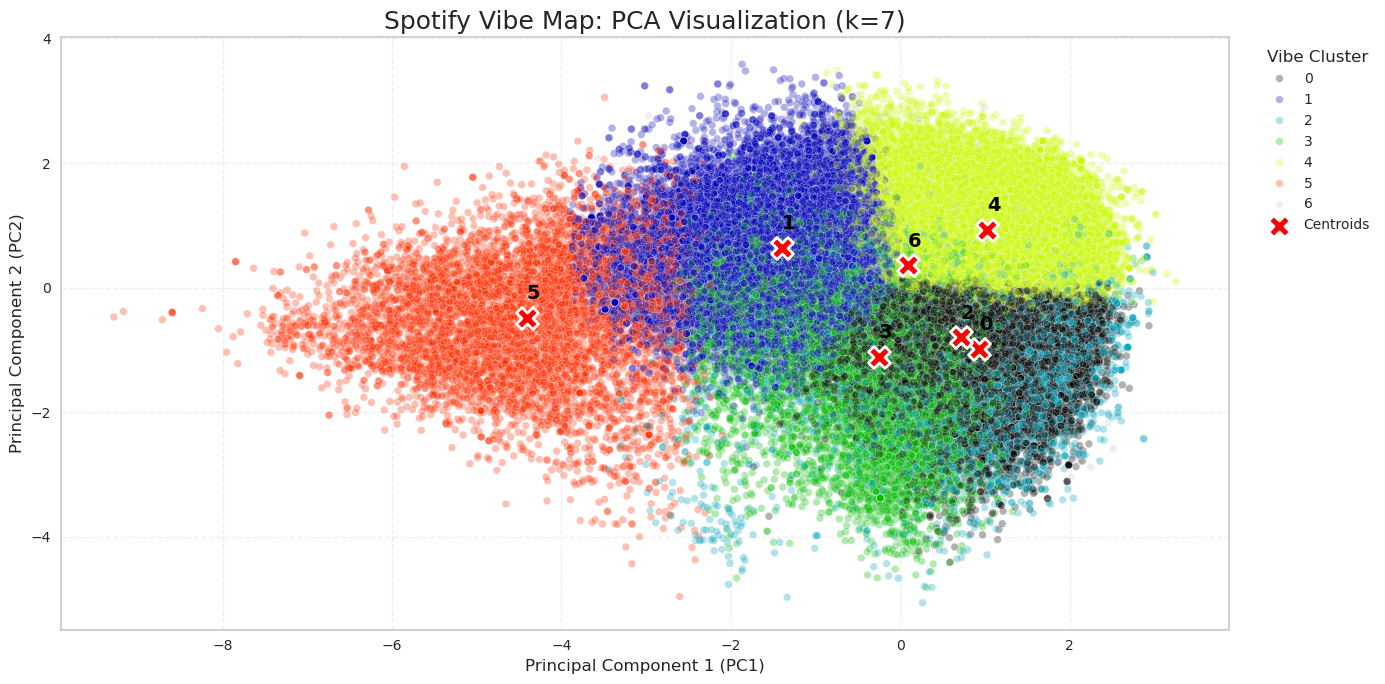

In [20]:
# 1. Transform the Cluster Centers (The Fix)
# We wrap the numpy array in a DataFrame with the same columns as the training data
centers_df = pd.DataFrame(kmeans_final.cluster_centers_, columns=df_scaled.columns)
pca_centers = pca.transform(centers_df)

# 2. Setup the Canvas
plt.figure(figsize=(14, 7))

# 3. Plot the Data Points
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, 
                palette='nipy_spectral', alpha=0.3, s=30, 
                legend='full')

# 4. Plot the Centroids
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], s=250, 
            c='red', marker='X', label='Centroids',
            edgecolor='white', linewidth=2)

# 5. Label the Centroids
for i, (x, y) in enumerate(pca_centers):
    plt.text(x, y + 0.3, str(i), fontsize=14, fontweight='bold', color='black')

# 6. Aesthetics
plt.title('Spotify Vibe Map: PCA Visualization (k=7)', fontsize=18)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Vibe Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

---

<span style='color:brown'>

## 6.4 PCA Component Analysis

</span>

Examine the PCA components to understand what each principal component represents in terms of the original features.

**Your code:**

--- PCA Component Loadings (Feature Weights) ---
                    PC1    PC2
danceability      0.246  0.575
energy            0.509 -0.277
loudness          0.517 -0.079
speechiness       0.101  0.027
acousticness     -0.439  0.296
instrumentalness -0.282 -0.306
liveness          0.085 -0.233
valence           0.295  0.522
tempo             0.189 -0.280


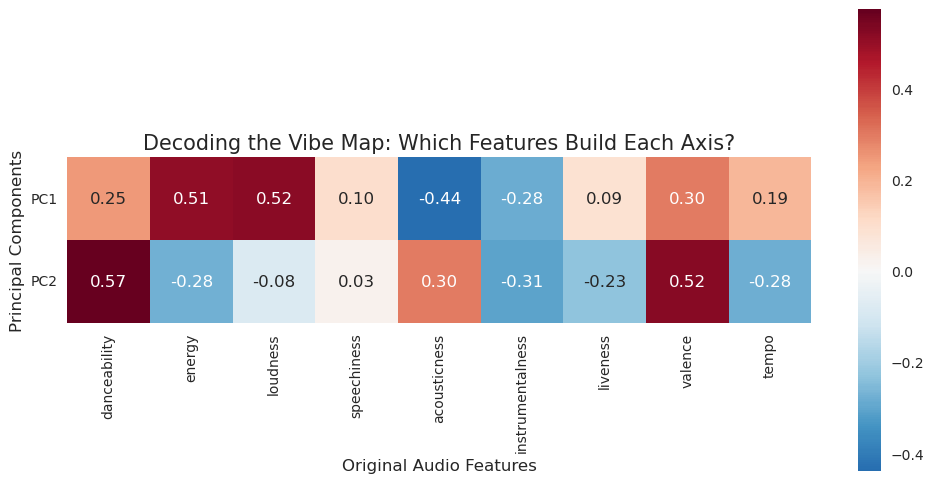

In [21]:
# TODO: Analyze PCA components
# - Create a DataFrame of component loadings (pca.components_)
# - Visualize which original features contribute most to each PC


# 1. Create a DataFrame of component loadings
# The 'components_' attribute tells us how much weight each feature has in the Principal Component.
# Values close to 1 or -1 indicate strong influence. Values close to 0 mean the feature is ignored.
loadings_df = pd.DataFrame(pca.components_, columns=df_features.columns, 
                           index=['PC1', 'PC2'])

print("--- PCA Component Loadings (Feature Weights) ---")
# Transpose (.T) makes it easier to read: Features as rows, PCs as columns
print(loadings_df.T.round(3))

# 2. Visualize Loadings with a Heatmap
plt.figure(figsize=(12, 6))

# 'RdBu_r' is a diverging colormap: Red = Positive correlation, Blue = Negative correlation
sns.heatmap(loadings_df, annot=True, cmap='RdBu_r', center=0, fmt='.2f', square=True)

plt.title('Decoding the Vibe Map: Which Features Build Each Axis?', fontsize=15)
plt.xlabel('Original Audio Features', fontsize=12)
plt.ylabel('Principal Components', fontsize=12)
plt.yticks(rotation=0) # Keep Y-axis labels horizontal for readability

plt.show()

---

<span style='color:brown'>

# Part 7: Cluster Interpretation and Labeling

## 7.1 Cluster Profiles

</span>

For each cluster, calculate the mean values of all features and identify the defining characteristics.

**Your code:**

In [22]:
# 1. Group by Cluster and Calculate Means
# We group the data by our new cluster labels and calculate the average of each audio feature.
# This gives us the "centroid" or "archetype" of each vibe in human-readable units.
cluster_profiles = df.groupby('cluster')[features].mean()

print("--- Cluster Profiles Generated ---")

# 2. Display the Results with Visual Formatting
# We use Pandas Styling to add a background gradient. 
# - cmap='RdBu_r': Red for high values, Blue for low values.
# - axis=0: This compares values vertically (per feature). 
#   It helps us answer: "Which cluster has the highest Energy?"
formatted_profiles = cluster_profiles.style.background_gradient(cmap='RdBu_r', axis=0).format("{:.2f}")

# Display the styled table
# Note: In a Jupyter Notebook, simply typing the variable name renders the HTML table.
formatted_profiles

--- Cluster Profiles Generated ---


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0.000000,0.47,0.81,-5.33,0.08,0.07,0.03,0.19,0.37,139.83
1.000000,0.53,0.38,-10.64,0.05,0.68,0.03,0.16,0.39,113.13
2.000000,0.52,0.75,-6.98,0.09,0.28,0.07,0.74,0.51,123.53
3.000000,0.59,0.74,-8.41,0.07,0.11,0.79,0.17,0.34,126.87
4.000000,0.70,0.72,-6.39,0.09,0.21,0.02,0.16,0.69,117.71
5.000000,0.35,0.17,-21.22,0.05,0.87,0.79,0.16,0.19,103.04
6.000000,0.58,0.67,-11.17,0.83,0.73,0.01,0.64,0.45,101.86


---

<span style='color:brown'>

## 7.2 Sample Songs from Each Cluster

</span>

Display a few sample songs from each cluster to help validate your interpretations.

**Your code:**

In [23]:
# TODO: Display sample songs from each cluster
# - For each cluster, show 3-5 random tracks (with track name and artist if available)

# --- 7.2 Sample Songs from Each Cluster ---

print("--- Validating Vibes: Sample Tracks per Cluster ---")

# Loop through each cluster label (0 to 6)
for cluster_id in range(7):
    print(f"\n[Cluster {cluster_id}]")
    
    # Filter the DataFrame to get only songs from this cluster
    cluster_data = df[df['cluster'] == cluster_id]
    
    # Sample 5 random songs
    # standardized random_state allows you to discuss specific examples 
    # in your report without them changing every time you run the cell.
    if len(cluster_data) >= 5:
        samples = cluster_data.sample(n=5, random_state=42)
    else:
        samples = cluster_data  # Fallback for very small clusters
        
    # Display the Track Name and Artist
    # We stick to these columns to keep the output clean and readable
    for _, song in samples.iterrows():
        print(f"  🎵 {song['track_name']} - {song['artists']}")

--- Validating Vibes: Sample Tracks per Cluster ---

[Cluster 0]
  🎵 Hymn of Heaven - Phil Wickham
  🎵 Deixa - Lagum
  🎵 Mi Mamá Me Lo Teje Todo - Lino y Lana - 31 Minutos
  🎵 Invoke the Machine - Avantasia
  🎵 サヨナラの意味 - Nogizaka46

[Cluster 1]
  🎵 Lean On Me - Seal
  🎵 Good Things Fall Apart (with Jon Bellion) - Stripped - ILLENIUM;Jon Bellion
  🎵 Gwát - Rojin Sharafi
  🎵 Kabhi Alvida Naa Kehna - Shankar-Ehsaan-Loy;Sonu Nigam;Alka Yagnik
  🎵 Attila - Oltre a quel limite t'attendo - Giuseppe Verdi;Vincenzo Ciliberti

[Cluster 2]
  🎵 I Need You - Marc Anthony
  🎵 Roda Ciranda / Segure Tudo / Casa De Bamba - Ao Vivo - Martinho Da Vila
  🎵 Superhuman / First Time (Tritonia 400) - Tritonal Mashup - Tritonal;Codeko;Seven Lions;SLANDER;Dabin;Dylam Matthew
  🎵 Get Back - Remastered 2009 - The Beatles
  🎵 Rompecabezas De Amor... - Live In Buenos Aires / 2016 - Las Pastillas del Abuelo

[Cluster 3]
  🎵 Helarctos - Nu:Tone
  🎵 Technotifiziert - Tim Wittig
  🎵 Fossil Funk Piano Mix - Live Studio 

---

<span style='color:brown'>
    
## 7.3 Naming Your Vibes

</span>

**Written Response :**

Based on your analysis of cluster profiles and sample songs, assign a descriptive "vibe" name to each cluster. For each cluster, explain:

1. The vibe name you chose (e.g., "Chill", "Workout", "Party", "Focus", "Sad/Melancholy", etc.)
2. The key features that define this cluster (e.g., "high energy, high danceability, high valence")
3. Why these features suggest this particular vibe

Present your findings in a clear format:

*Your response:*

| Cluster | Vibe Name | Key Features | Justification |
|---------|-----------|--------------|---------------|
| 0 | High Intensity / Workout | High Tempo (~140 BPM), High Energy (0.81) | These tracks are fast and loud. The combination of high BPM and energy makes them perfect for cardio, running, or intense gaming sessions. |
| 1 | Mellow / Acoustic | High Acousticness (0.68), Low-Mid Energy | These are softer tracks with organic textures. The high acousticness suggests ballads or unplugged versions, ideal for relaxation or studying. |
| 2 | Live Performance | Very High Liveness (0.74) | This is a structural cluster. The model detected the specific audio signature of live audiences and concert acoustics, separating them from studio recordings. |
| 3 | Electronic / Techno | High Instrumentalness (0.79), Low Acousticness | The lack of vocals combined with low acousticness points to synthesized, beat-driven music (EDM, Techno, House) rather than organic instrumentals. |
| 4 | Dance Pop / Party | High Danceability (0.70), High Valence (0.69) | The "Happy" cluster. High valence and danceability indicate positive, rhythmic, and radio-friendly hits suitable for parties. |
| 5 | Classical / Ambient | High Instrumentalness (0.79), High Acousticness (0.87) | Unlike Cluster 3, these instrumentals are highly acoustic. This strongly correlates with orchestral music, piano solos, or ambient scores. |
| 6 | Spoken Word / Comedy | Extreme Speechiness (0.83) | The defining feature is speech. The model successfully isolated non-musical tracks like stand-up comedy, poetry, and audiobooks. |

In [24]:
# 1. Define the Mapping Dictionary
# This dictionary translates the mathematical Cluster ID (0-6) into a Human-Readable Label.
vibe_mapping = {
    0: "High Intensity / Workout",
    1: "Mellow / Acoustic",
    2: "Live Performance",
    3: "Electronic / Techno",
    4: "Dance Pop / Party",
    5: "Classical / Ambient",
    6: "Spoken Word / Comedy"
}

# 2. Apply the Mapping
# We create a new column 'vibe_name' to store these descriptive labels.
df['vibe_name'] = df['cluster'].map(vibe_mapping)

# 3. Validation
# Display a random sample to visually verify that the labels make sense with the track names.
print("--- Vibe Labeling Verification ---")
# Sampling 10 random tracks to check the assignment
display(df[['track_name', 'artists', 'vibe_name']].sample(10, random_state=42))

# 4. Final Distribution Check
# Print the count of songs per Vibe to see the final composition of our catalog.
print("\n--- Final Vibe Distribution ---")
display(df['vibe_name'].value_counts().to_frame())

--- Vibe Labeling Verification ---


,track_name,artists,vibe_name
113186,No Other Name,Hillsong Worship,High Intensity / Workout
42819,Failed Organum,Internal Rot,Electronic / Techno
59311,"Save the Trees, Pt. 1",Zhoobin Askarieh;Ali Sasha,Mellow / Acoustic
91368,Merry Christmas,Bryan Adams,Dance Pop / Party
61000,月の大きさ,Nogizaka46,Dance Pop / Party
96815,"Jah Jah Revolta, Pt. 2",BaianaSystem,Dance Pop / Party
18939,Please Stop Communicating,Joe DeRosa,Spoken Word / Comedy
72760,A Form of Protest,Cane Hill,High Intensity / Workout
25788,I'm Ready - Radio Edit,Kano,Dance Pop / Party
87169,Proibida Pra Mim (Grazon) - Ao Vivo,Charlie Brown Jr.,High Intensity / Workout



--- Final Vibe Distribution ---


,count
vibe_name,
Dance Pop / Party,36561
High Intensity / Workout,26436
Mellow / Acoustic,22975
Electronic / Techno,11731
Live Performance,7789
Classical / Ambient,7392
Spoken Word / Comedy,1116


---

## Submission Checklist

Before submitting, ensure you have completed:

- [x] **Part 1:** Libraries imported and data loaded successfully
- [x] **Part 2:** EDA completed with distributions, correlations, and written discussion
- [x] **Part 3:** Data preprocessed with missing values handled and features scaled
- [x] **Part 4:** Elbow and silhouette analysis completed with justified choice of k
- [x] **Part 5:** Final k-means model fitted and cluster sizes analyzed
- [x] **Part 6:** PCA applied and clusters visualized in 2D
- [x] **Part 7:** Clusters interpreted and vibes named with justification
- [x] **All code cells** run without errors
- [x] **All written responses** completed thoughtfully


Please submit your finished project by **December 13**.

---

*Good luck, and have fun discovering the hidden vibes in your music data!*


